In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Linear Model

In [3]:
train_X = np.asanyarray(data['FUELCONSUMPTION_CITY'])
train_Y = np.asanyarray(data['CO2EMISSIONS'])
graph = tf.Graph()

with graph.as_default():
    a = tf.Variable(30.1)
    b = tf.Variable(3.5)
    y = a * train_X + b
    loss = tf.reduce_mean(tf.square(y - train_Y))
    optimizer = tf.compat.v1.train.AdamOptimizer()
    train = optimizer.minimize(loss)
    init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session(graph=graph)
sess.run(init)

loss_values = []
train_data = []
for step in range(100000):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 10 == 0:
        train_data.append([a_val, b_val])
        
print(step, loss_val, a_val, b_val)

99999 776.48474 13.876439 71.72


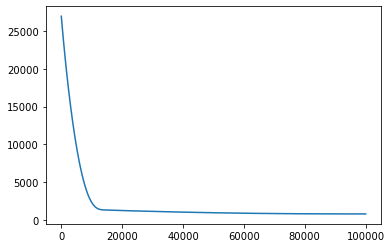

In [4]:
import matplotlib.pyplot as plt
plt.plot(loss_values)

In [12]:
pred = sess.run(y)

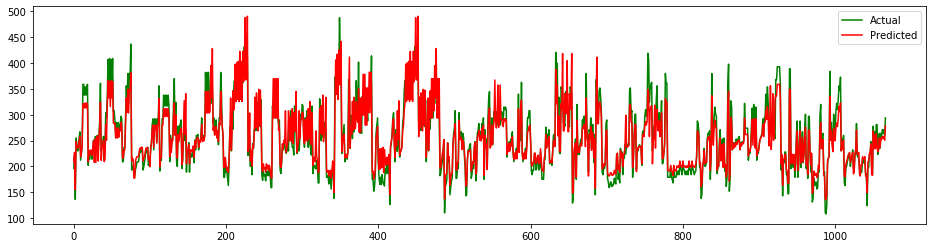

In [13]:
plt.figure(figsize=(16,4))
plt.plot(train_Y,label='Actual', color='g')
plt.plot(pred, label='Predicted', color='r')
plt.legend(loc='upper right')